<a href="https://colab.research.google.com/github/tjgustjr30723/linear-algebra2/blob/main/%EC%84%9C%ED%98%84%EC%84%9D_%EC%84%A0%EB%8C%802_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%B6%93%EA%BD%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


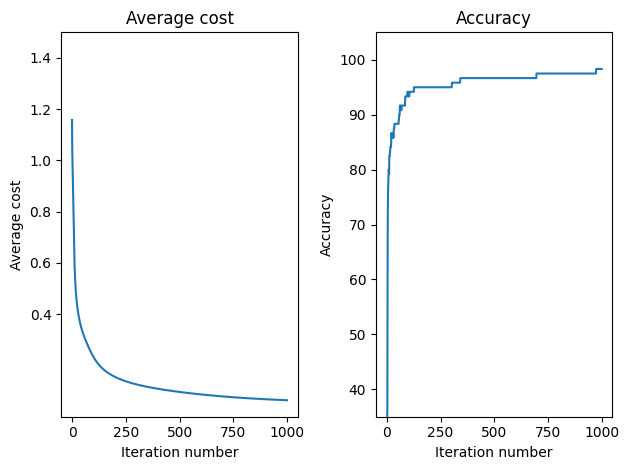

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/linear_a2/Iris.csv', delimiter=',', skip_header=1, usecols=(1, 2, 3, 4))
labels = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/linear_a2/Iris.csv', delimiter=',', skip_header=1, usecols=5, dtype=str)

label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
numeric_labels = np.array([label_map[label] for label in labels])

data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

np.random.seed(42)
indices = np.random.permutation(len(data))
split = int(0.8 * len(data))
train_indices, test_indices = indices[:split], indices[split:]
train_data, test_data = data[train_indices], data[test_indices]
train_labels, test_labels = numeric_labels[train_indices], numeric_labels[test_indices]

input_size = 4
hidden_size = 8
output_size = 3
learning_rate = 0.01
epochs = 1000

np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

history = {'loss': [], 'accuracy': []}
for epoch in range(epochs):
    hidden_input = np.dot(train_data, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    output = np.dot(hidden_output, weights_hidden_output)
    output_softmax = np.exp(output) / np.sum(np.exp(output), axis=1, keepdims=True)
    output_error = output_softmax - np.eye(output_size)[train_labels]
    hidden_error = np.dot(output_error, weights_hidden_output.T) * sigmoid_derivative(hidden_output)
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, output_error)
    weights_input_hidden -= learning_rate * np.dot(train_data.T, hidden_error)
    loss = -np.mean(np.log(output_softmax[np.arange(len(train_data)), train_labels]))
    predictions = np.argmax(output_softmax, axis=1)
    accuracy = np.mean(predictions == train_labels)
    history['loss'].append(loss)
    history['accuracy'].append(accuracy)

plt.subplot(1, 2, 1)
plt.plot(np.array(history['loss']))
plt.xlabel('Iteration number')
plt.ylabel('Average cost')
plt.title('Average cost')
plt.ylim(0, 1.5)
plt.yticks(np.arange(0.4, 1.41, 0.2))

plt.subplot(1, 2, 2)
plt.plot(np.array(history['accuracy']) * 100)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(35, 105)
plt.yticks(np.arange(40, 101, 10))

plt.tight_layout()
plt.show()
